In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

In [5]:
# Convert labels to even (0) / odd (1)
y_train = y_train % 2
y_test = y_test % 2

In [6]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (even=0, odd=1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [8]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 35s 40ms/step - accuracy: 0.9142 - loss: 0.2074 - val_accuracy: 0.9807 - val_loss: 0.0523
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - accuracy: 0.9817 - loss: 0.0523 - val_accuracy: 0.9895 - val_loss: 0.0352
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.9876 - loss: 0.0352 - val_accuracy: 0.9892 - val_loss: 0.0337
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 32s 38ms/step - accuracy: 0.9914 - loss: 0.0251 - val_accuracy: 0.9918 - val_loss: 0.0260
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.9940 - loss: 0.0181 - val_accuracy: 0.9912 - val_loss: 0.0309


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy (even vs odd): {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9910 - loss: 0.0245
Test accuracy (even vs odd): 99.15%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


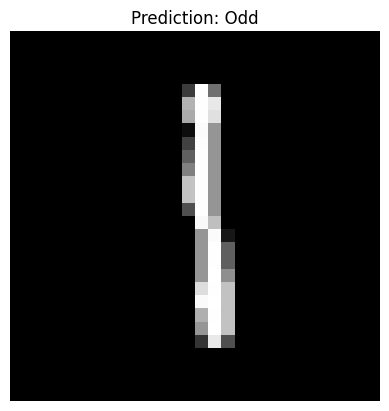

In [12]:
import matplotlib.pyplot as plt

idx = 1236
plt.imshow(x_test[idx].squeeze(), cmap='gray')
plt.title("Prediction: " + ("Odd" if model.predict(x_test[idx:idx+1])[0][0] > 0.5 else "Even"))
plt.axis('off')
plt.show()
